## Week 3 - MNIST Data Set Training SN: 18003453

In this notebook a Keras machine learning model is trained on the MNIST characters datset, this is then explored to see the effect random distrubtions of noise has on the accuracy of the model both when the model is trained on data sets with noise and when it is tested on data sets with noise. Conclusions are then drawn from this explanation to suggest efficacy of the effects of training the data on models with noise.

In [1]:
from platform import python_version

print(python_version())

#importing modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math

import tensorflow as tf
from tensorflow import keras


mpl.rcParams.update({'font.size': 13})
mpl.rcParams['figure.dpi']=200

3.8.12


In [2]:
def MNISTnoise(data, y_noise):
  """This function outputs the MNIST dataset with noise added to each of the images, this noise ranges from 0 to y_n. 
  The imported data must be rescaled for [0,1]
  Inputs 
  data: MNIST data set
  y_noise: max value the noise may potentially takes values between [0,1]
  Returns
  data_noise: the MNIST data set with added noise"""

  #creating noise array
  
  noise = y_noise * np.random.rand(*data.shape)

  #adding noise
  data_noise = data + noise

  return data_noise


### Training the Model to the MNIST data

Below the MNIST data is rescaled and the model is trained against it. Then, the model is tested against the test data several times, each time the test data has had slightly differnt amounts of uniformly random noise added. This noise contribution is then plotted against the accuracy of the model to see the effects adding noise to the test set has on accuracy.

In [3]:
#importing MNIST data set
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#rescaling
train_images = train_images/255
test_images = test_images/255

#creating the network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(70,activation='relu'),
    keras.layers.Dense(10)])

#setting loss function, optimiser and metrics
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

11493376/11490434 [==============================] - 1s 0us/step


2021-11-09 21:01:15.955233: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-09 21:01:15.959835: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#training the model
history = model.fit(train_images, train_labels,batch_size=100, epochs=30)

2021-11-09 21:01:25.905575: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/30
600/600 [==============================] - 3s 2ms/step - loss: 0.7588 - accuracy: 0.7731
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9400
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1529 - accuracy: 0.9544
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1298 - accuracy: 0.9602
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1170 - accuracy: 0.9648
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9673
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9702
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9695
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9731
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9724

In [5]:
#testing this model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1967 - accuracy: 0.9618

Test accuracy: 0.9617999792098999


In [6]:
#testing the model on test data set with different noise contributions

n_tests = 20  #number of tests against different noise contributions
y_noise = 0.9  #max val of noise
loss_arr = np.zeros(n_tests)
acc_arr = np.zeros(n_tests)
noise_arr = np.linspace(0,y_noise,n_tests)

#testing over different noises
for i in range(n_tests):
  loss_arr[i], acc_arr[i] = model.evaluate(MNISTnoise(test_images,noise_arr[i]),  test_labels, verbose=2)

313/313 - 0s - loss: 0.1967 - accuracy: 0.9618
313/313 - 0s - loss: 0.2182 - accuracy: 0.9568
313/313 - 0s - loss: 0.2811 - accuracy: 0.9415
313/313 - 0s - loss: 0.4098 - accuracy: 0.9097
313/313 - 0s - loss: 0.6285 - accuracy: 0.8628
313/313 - 0s - loss: 0.9210 - accuracy: 0.8116
313/313 - 0s - loss: 1.2823 - accuracy: 0.7621
313/313 - 0s - loss: 1.6980 - accuracy: 0.7118
313/313 - 0s - loss: 2.1307 - accuracy: 0.6629
313/313 - 1s - loss: 2.6152 - accuracy: 0.6246
313/313 - 1s - loss: 3.0656 - accuracy: 0.5863
313/313 - 1s - loss: 3.5654 - accuracy: 0.5522
313/313 - 0s - loss: 4.0420 - accuracy: 0.5217
313/313 - 0s - loss: 4.4997 - accuracy: 0.4875
313/313 - 0s - loss: 4.9802 - accuracy: 0.4692
313/313 - 0s - loss: 5.4603 - accuracy: 0.4375
313/313 - 1s - loss: 5.9998 - accuracy: 0.4085
313/313 - 0s - loss: 6.4001 - accuracy: 0.3920
313/313 - 0s - loss: 6.9489 - accuracy: 0.3662
313/313 - 0s - loss: 7.3778 - accuracy: 0.3445


Text(0.5, 1.0, 'Plot of Accuracy of model against Random Noise contribution')

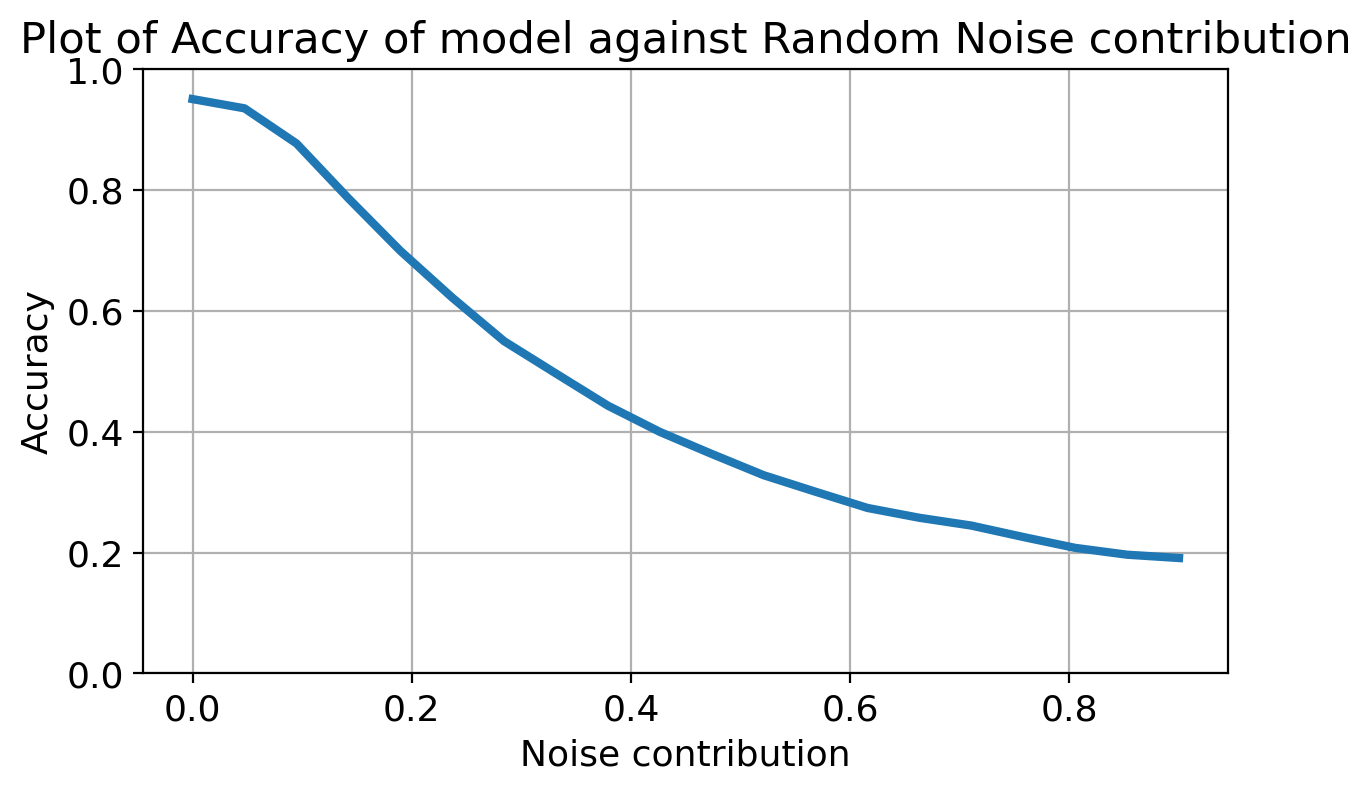

In [67]:
#plotting test data
fig,ax = plt.subplots(figsize=(7,4))
ax.plot(noise_arr,acc_arr, linewidth=3)
ax.set_xlabel("Noise contribution")
ax.set_ylabel("Accuracy")
ax.set_ylim([0,1])
ax.grid()
ax.set_title('Plot of Accuracy of model against Random Noise contribution')

### Training the model with noise

Now the model will be trained again except this time it will be trained against training data that has had noise added to it. Then the same comparison of test accuracy will be applied as before to see the difference training on data with noise makes on the accuracy of the model.

In [76]:
y_noise = 0.2

#training the model with added noise to the training set
history = model.fit(MNISTnoise(train_images,y_noise), train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1447 - accuracy: 0.9609
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1271 - accuracy: 0.9632
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1180 - accuracy: 0.9654
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9661
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1109 - accuracy: 0.9674
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9683
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1057 - accuracy: 0.9680
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1054 - accuracy: 0.9678
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.9699
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9698

In [77]:
#testing the noise trained model on test data set with different noise contributions

n_tests = 20  #number of tests against different noise contributions
y_noise = 0.9  #max val of noise
loss_arr = np.zeros(n_tests)
acc_arr = np.zeros(n_tests)
noise_arr = np.linspace(0,y_noise,n_tests)

#testing over different noises
for i in range(n_tests):
  loss_arr[i], acc_arr[i] = model.evaluate(MNISTnoise(test_images,noise_arr[i]),  test_labels, verbose=2)

313/313 - 0s - loss: 0.4462 - accuracy: 0.9419
313/313 - 0s - loss: 0.3912 - accuracy: 0.9458
313/313 - 0s - loss: 0.3564 - accuracy: 0.9499
313/313 - 0s - loss: 0.3435 - accuracy: 0.9488
313/313 - 0s - loss: 0.3435 - accuracy: 0.9456
313/313 - 0s - loss: 0.3710 - accuracy: 0.9347
313/313 - 0s - loss: 0.4127 - accuracy: 0.9223
313/313 - 0s - loss: 0.4649 - accuracy: 0.9101
313/313 - 0s - loss: 0.6049 - accuracy: 0.8802
313/313 - 0s - loss: 0.7626 - accuracy: 0.8480
313/313 - 0s - loss: 0.9826 - accuracy: 0.8128
313/313 - 0s - loss: 1.2124 - accuracy: 0.7783
313/313 - 0s - loss: 1.4925 - accuracy: 0.7405
313/313 - 0s - loss: 1.8165 - accuracy: 0.7041
313/313 - 0s - loss: 2.1501 - accuracy: 0.6641
313/313 - 0s - loss: 2.4725 - accuracy: 0.6379
313/313 - 0s - loss: 2.8321 - accuracy: 0.6049
313/313 - 0s - loss: 3.1520 - accuracy: 0.5781
313/313 - 0s - loss: 3.4870 - accuracy: 0.5508
313/313 - 0s - loss: 3.8219 - accuracy: 0.5341


Text(0.5, 1.0, 'Plot of Accuracy of model against Random Noise contribution of 0.2')

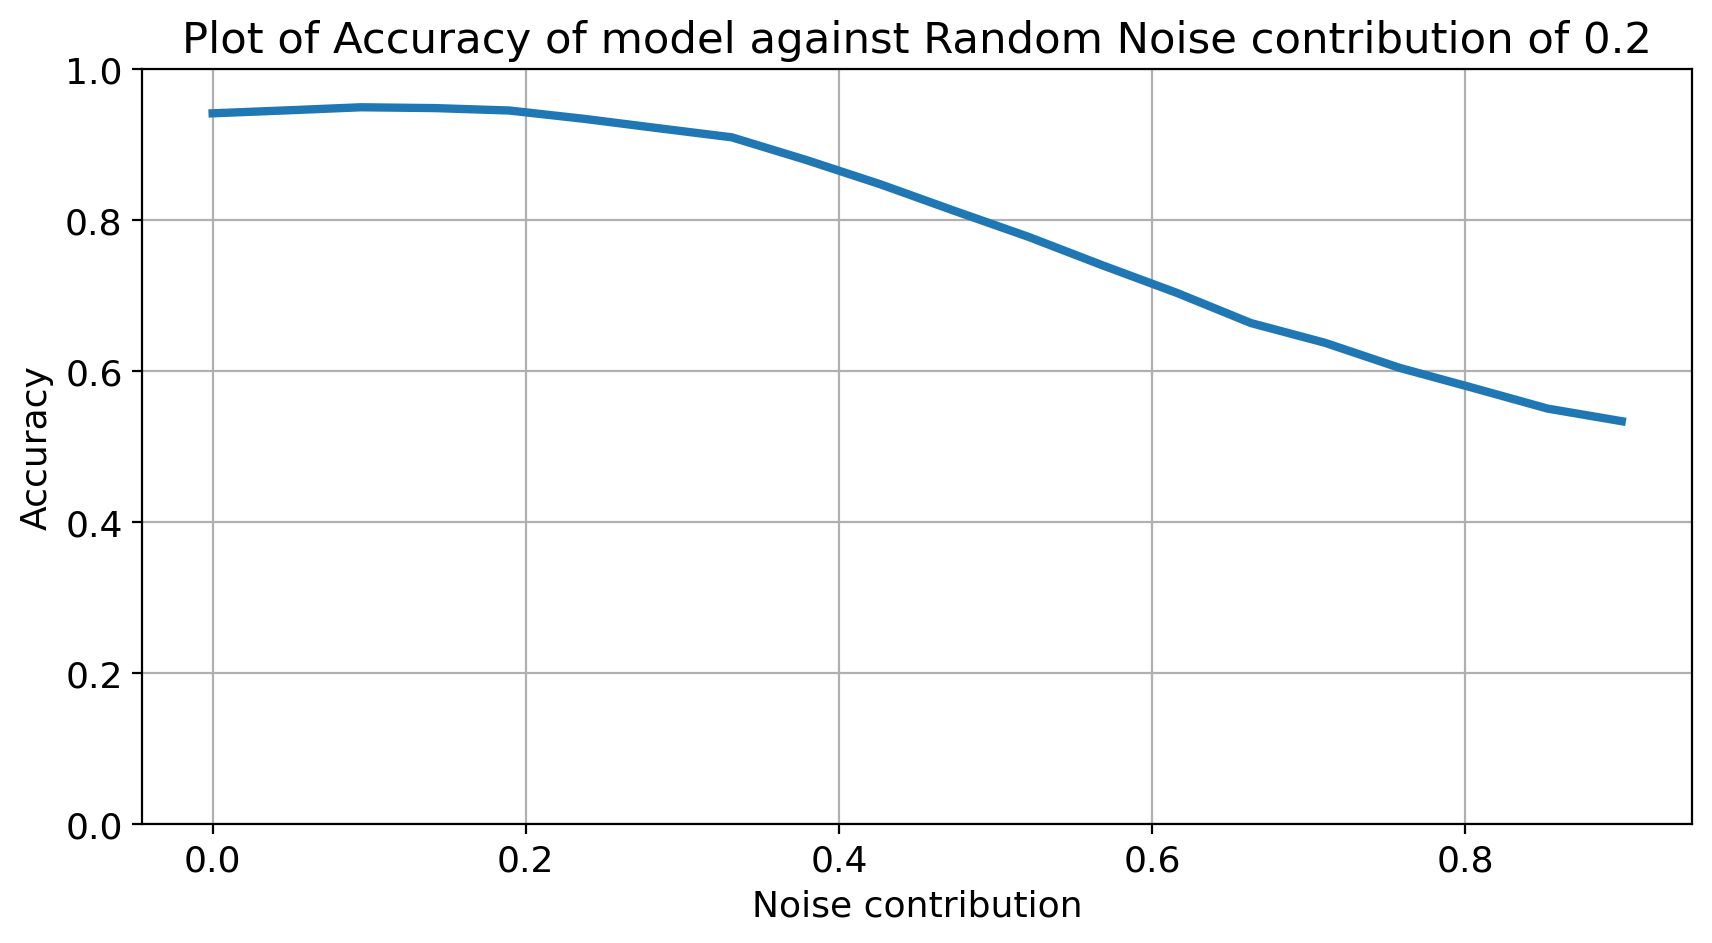

In [79]:
#plotting test data
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(noise_arr,acc_arr, linewidth=3)
ax.set_xlabel("Noise contribution")
ax.set_ylabel("Accuracy")
ax.set_ylim([0,1])
ax.grid()
ax.set_title('Plot of Accuracy of model against Random Noise contribution of 0.2')

Below a function has been created to train the model a few times with different noises added to the training data to find the most effective noise to train the model with to gain the highest accuracy in results.

In [55]:
def model_noise_train(train_noise, mod_data, n_tests,noise_max):
  """ This function trains the model a few times over data with different noise contributions and 
  then tests them against test values with different noise values aswell, the accuracy results of this are then stored.
  Inputs
  train_noise: array of noise contributions for training data
  mod_data: data to train model on
  n_tests: number of tests against different noise contributions
  noise_max: max val of noise
  Returns
  loss_arr: array of loss function for each model and each noise contribution
  acc_arr: array of accuracy for each model and each noise contribution
  """
  n_models = len(train_noise)

  #setting up arrays
  loss_arr = np.zeros((n_models, n_tests))
  acc_arr = np.zeros((n_models, n_tests))
  noise_arr = np.linspace(0,noise_max,n_tests)

  for n in range(n_models):

    #training the model with added noise to the training set
    history = model.fit(MNISTnoise(train_images,train_noise[n]), train_labels,batch_size=100, epochs=30) 

    #testing over different noises
    for i in range(n_tests):
      loss_arr[n,i], acc_arr[n,i] = model.evaluate(MNISTnoise(test_images,noise_arr[i]),  test_labels, verbose=2)

  return loss_arr, acc_arr

In [56]:
train_noise = np.array([0,0.1,0.25,0.3,0.35,0.4,0.45,0.5,0.6])
n_tests = 20
noise_max = 1.5

loss_arr, acc_arr = model_noise_train(train_noise, train_images, n_tests,noise_max)

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0150 - accuracy: 0.9948
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9961
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0063 - accuracy: 0.9978
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9990
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 8.7628e-04 - accuracy: 0.9999
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 5.0390e-04 - accuracy: 1.0000
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 4.1482e-04 - accu

Text(0.5, 1.0, 'Plot of Accuracy of model against Random Noise contribution')

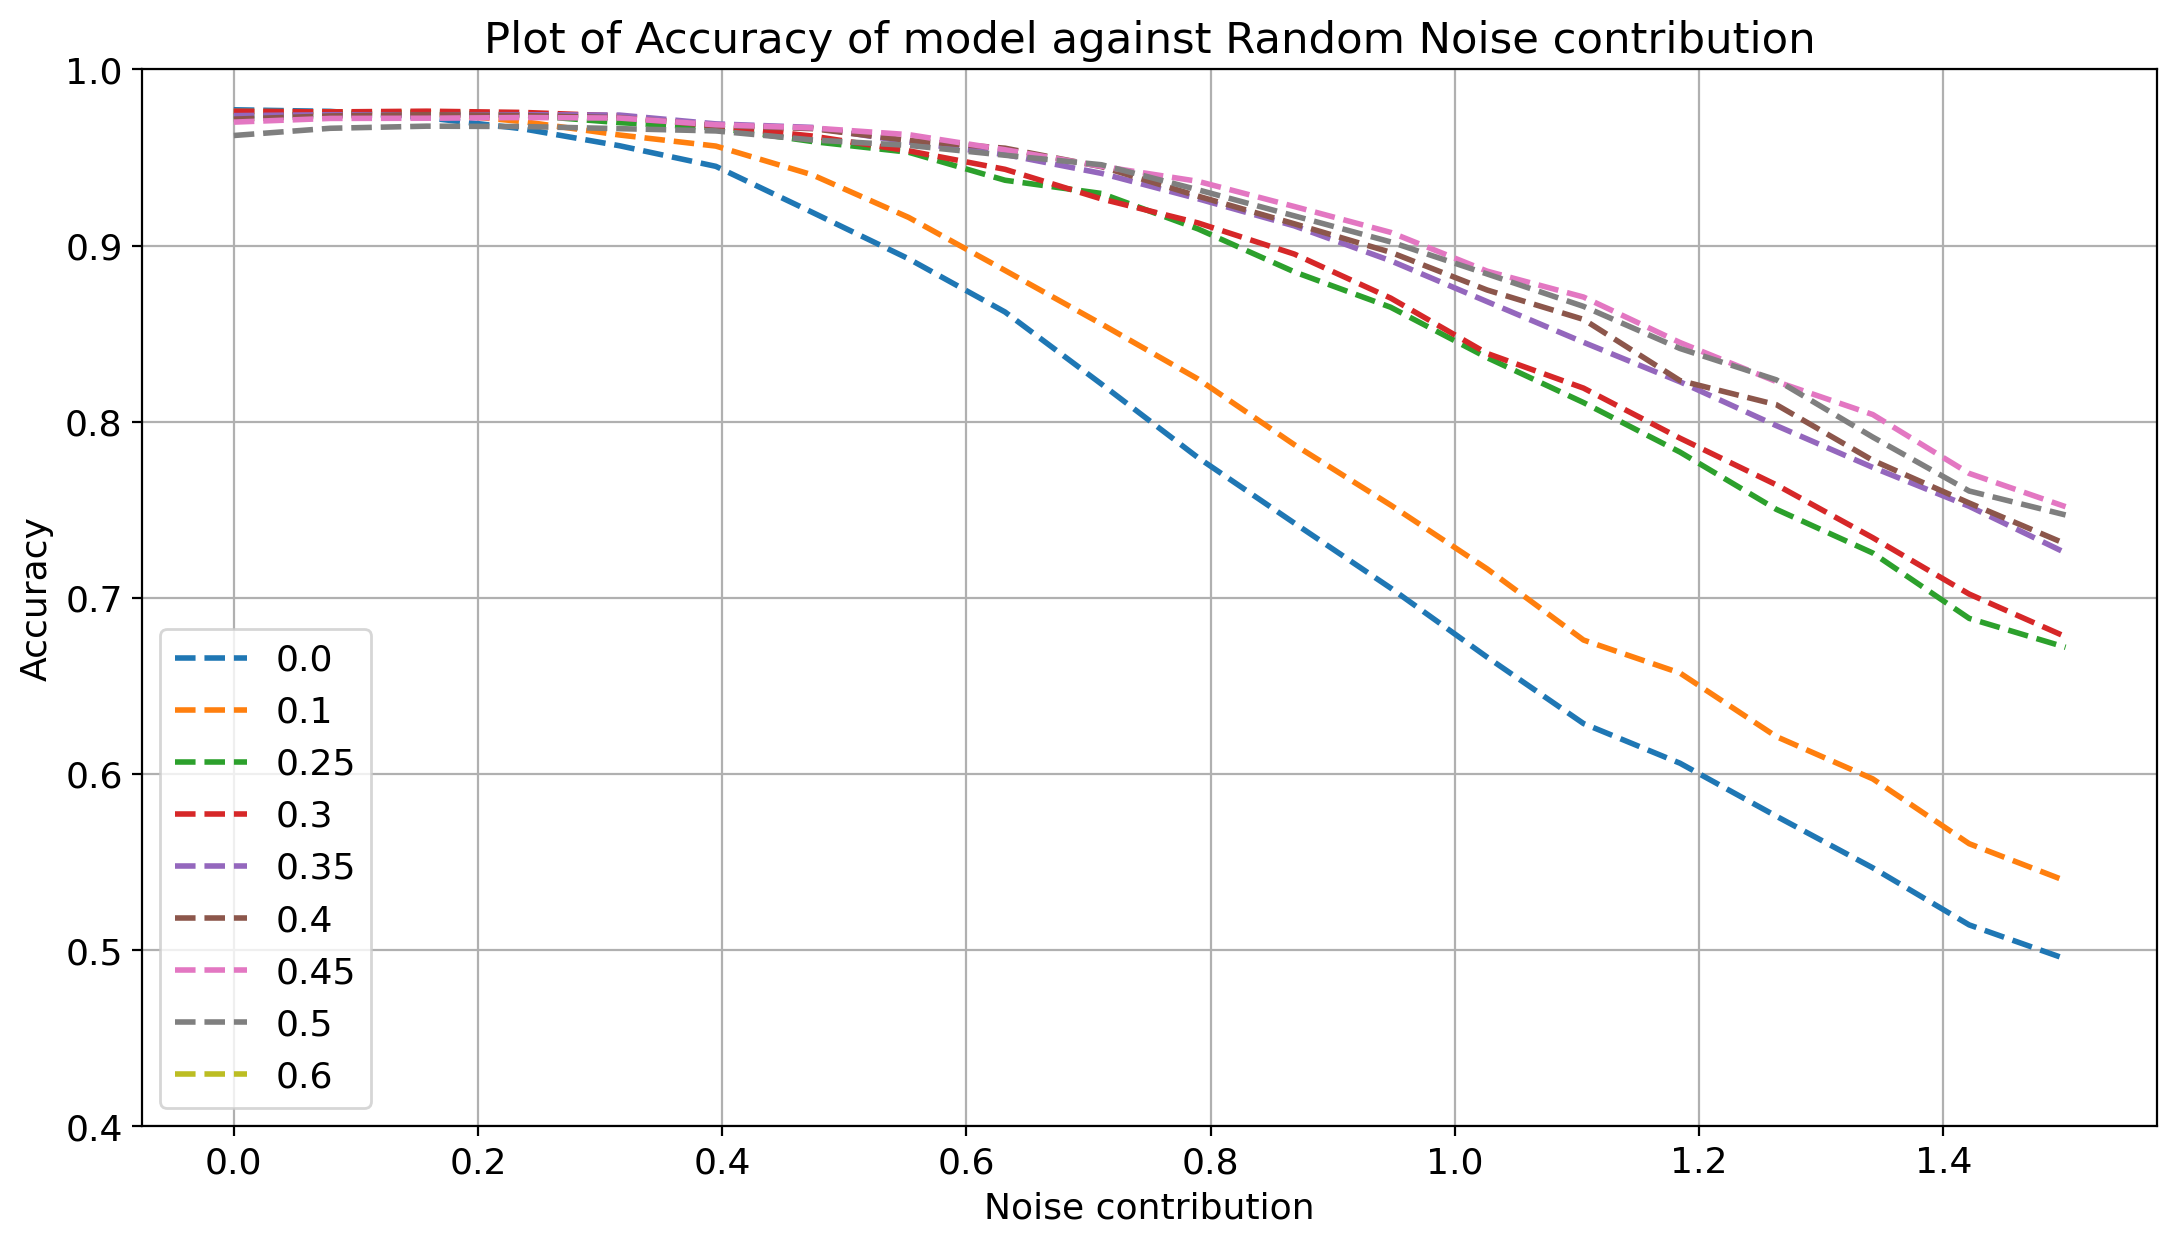

In [57]:
noise_arr = np.linspace(0,noise_max,n_tests)

#plotting test data
fig,ax = plt.subplots(figsize=(13,7))
for i in range(len(train_noise)):
  ax.plot(noise_arr,acc_arr[i,:],'--',label=(train_noise[i]), linewidth=2)
ax.set_xlabel("Noise contribution")
ax.set_ylabel("Accuracy")
ax.set_ylim([0.4,1])
ax.legend()
ax.grid()
ax.set_title('Plot of Accuracy of model against Random Noise contribution')

### Conclusion

From the graph above it is possible to see that models trained on data tend do see increases in 'performance' where the training data for the models has had uniformly random noise added to the set. There are certain caveats to this inital statement however; firstly 'performance' here is a measure of how accurately the model identifies test data over varying increments of noise added to the test data and secondly, the increase in performance is only seen for a specific magnitudes of noise added to the original data. 

Noise additions with a maximum magnitude between 0 and 0.45 have similarly accurate predictions of test data with 0 noise added, with models trained on data with noise of max magnitude above 0.45 the initial accruacy begins to drop, this may even be seen slightly with a training noise magnitude of 0.45.

When the accuracy of the models on test data with larger magnitudes of noise is studied it is possible to see that training on models with noise immediately brings benefits to accuracy. The models trained on data with 0 or 0.1 magnitude noise have a much more rapidly decreasing accuracy as the noise of the test data increases whereas models trained on more noisy data have accuracies that are slower to decrease.

The model that seems to have the largest increase in efficacy from training on data with noise depends upon how how we define 'performance'. If performance is defined as the highest overall accuracy over the range of noisy test data whilst placing increasing weight on the accuracy value of models of decreasingly noisy test data, then this would suggest that models trained on data with 0.3 max magnitude of noise gives the highest 'performance' model.

If the rate of change of the weightings as the noise of the test data increases was decreased, then the model trained on data with noise of max magnitude 0.4 would most be defined as having the highest performance.

